In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("IPL_matches.csv")
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [4]:
df.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [5]:
df = df.drop(['dl_applied', 'umpire1', 'umpire2', 'umpire3', 'result'], axis=1)
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [6]:
df = df.rename(columns={'team1': 'home_team', 'team2': 'away_team', 'player_of_match': 'man_of_match'})
df.head(5)

,id,season,city,date,home_team,away_team,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,man_of_match,venue
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [7]:
# dropping the duplicate rows
df.shape

(636, 13)

In [8]:
# duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


In [9]:
df.count()

id                636
season            636
city              629
date              636
home_team         636
away_team         636
toss_winner       636
toss_decision     636
winner            633
win_by_runs       636
win_by_wickets    636
man_of_match      633
venue             636
dtype: int64

In [10]:
df = df.drop_duplicates()
df.head(5)

,id,season,city,date,home_team,away_team,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,man_of_match,venue
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [11]:
df.count()

id                636
season            636
city              629
date              636
home_team         636
away_team         636
toss_winner       636
toss_decision     636
winner            633
win_by_runs       636
win_by_wickets    636
man_of_match      633
venue             636
dtype: int64

In [12]:
print(df.isnull().sum())

id                0
season            0
city              7
date              0
home_team         0
away_team         0
toss_winner       0
toss_decision     0
winner            3
win_by_runs       0
win_by_wickets    0
man_of_match      3
venue             0
dtype: int64


In [13]:
df.dropna()
df.count()
print(df.isnull().sum())

id                0
season            0
city              7
date              0
home_team         0
away_team         0
toss_winner       0
toss_decision     0
winner            3
win_by_runs       0
win_by_wickets    0
man_of_match      3
venue             0
dtype: int64


<Axes: xlabel='win_by_runs'>

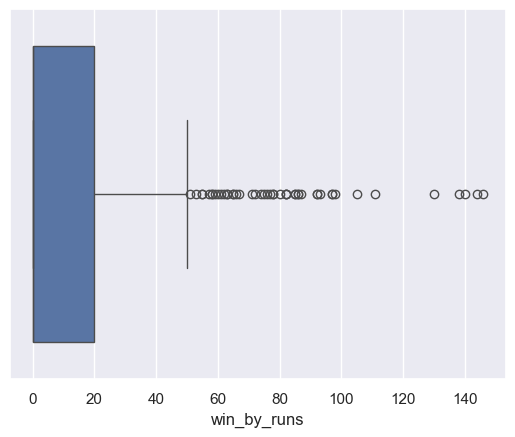

In [14]:
sns.boxplot(x=df['win_by_runs']) # boxplot

<Axes: xlabel='win_by_wickets'>

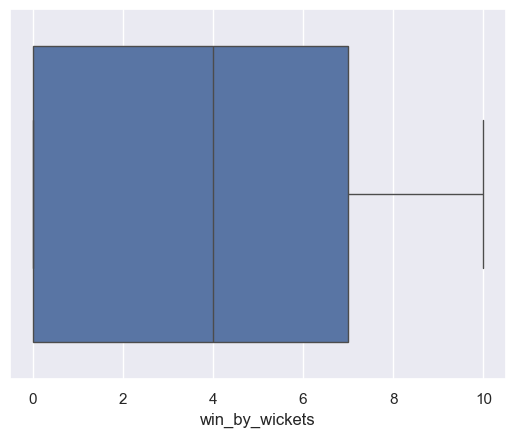

In [15]:
sns.boxplot(x=df['win_by_wickets']) # boxplot

Text(0.5, 0, 'Teams')

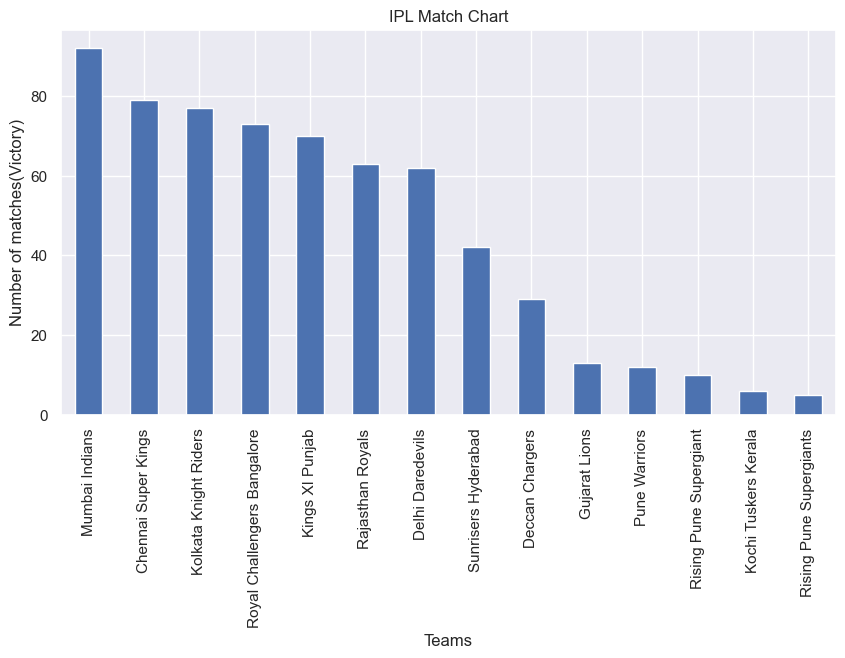

In [16]:
# histogram
df.winner.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("IPL Match Chart")
plt.ylabel('Number of matches(Victory)')
plt.xlabel('Teams')

Text(0.5, 0, 'Teams')

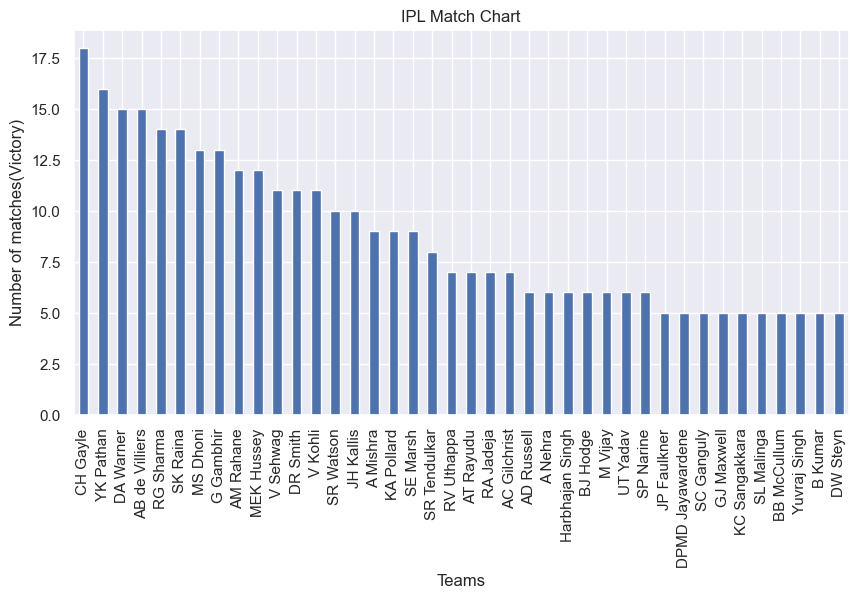

In [17]:
df.man_of_match.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("IPL Match Chart")
plt.ylabel('Number of matches(Victory)')
plt.xlabel('Teams')

Text(0.5, 0, 'Teams')

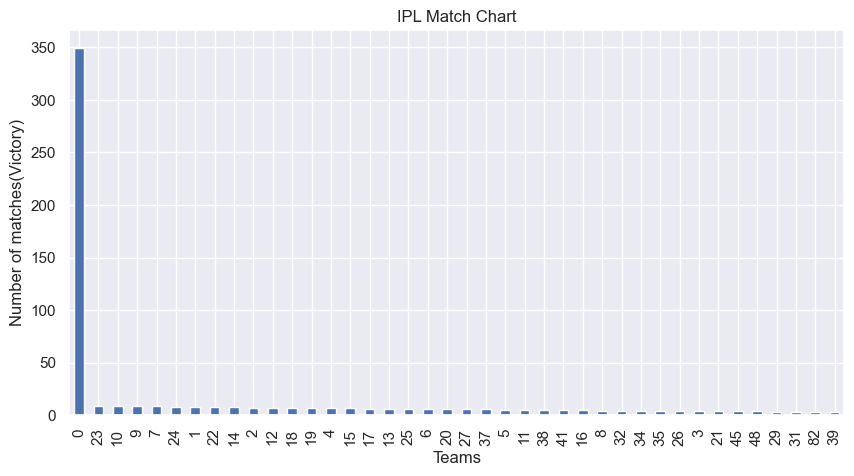

In [18]:
df.win_by_runs.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("IPL Match Chart")
plt.ylabel('Number of matches(Victory)')
plt.xlabel('Teams')

Text(0.5, 0, 'Teams')

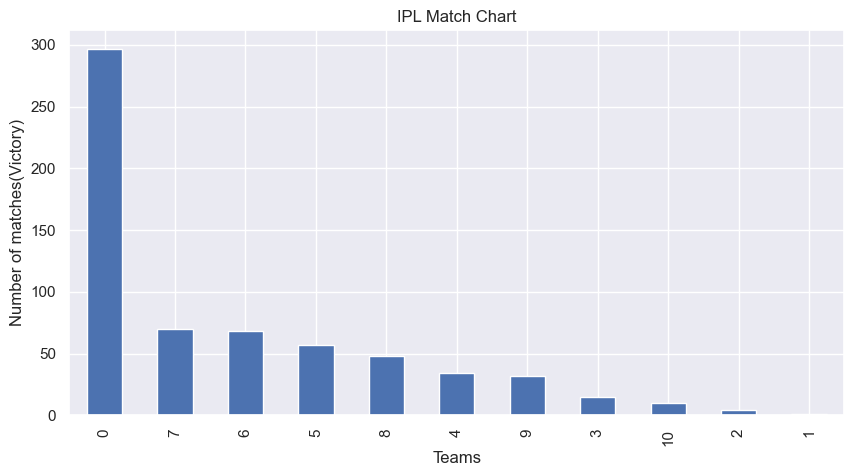

In [19]:
df.win_by_wickets.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("IPL Match Chart")
plt.ylabel('Number of matches(Victory)')
plt.xlabel('Teams')

Text(0.5, 0, 'Teams')

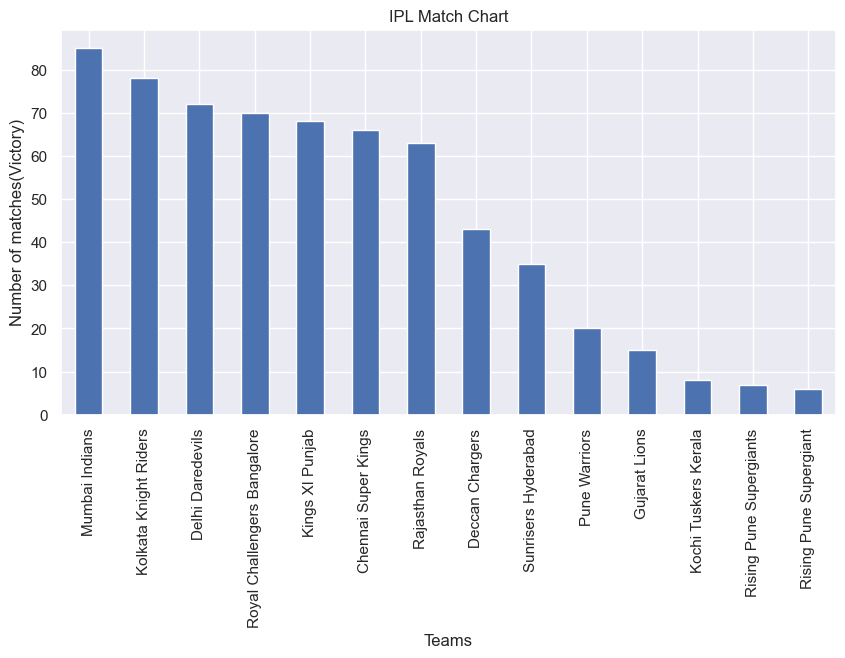

In [20]:
df.toss_winner.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("IPL Match Chart")
plt.ylabel('Number of matches(Victory)')
plt.xlabel('Teams')

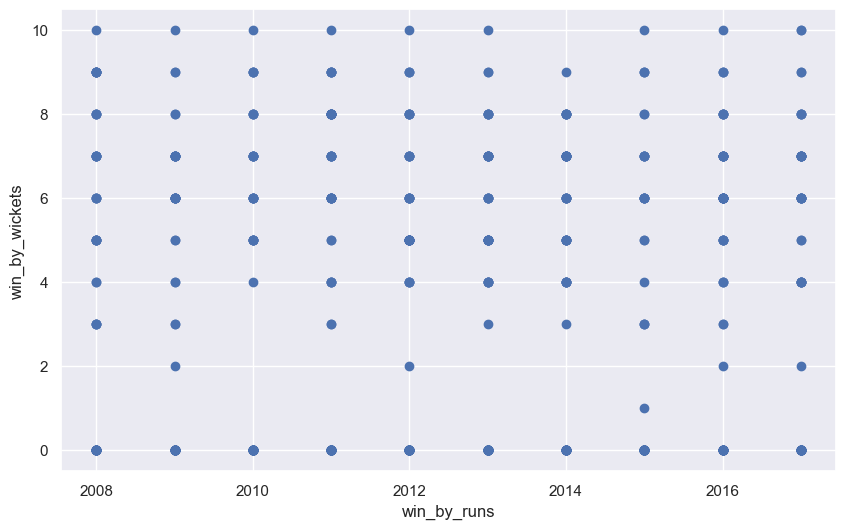

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(df['win_by_runs'], df['win_by_wickets'])
ax.scatter(df['season'], df['win_by_wickets'])
ax.set_xlabel('win_by_runs')
ax.set_ylabel('win_by_wickets')
plt.show()

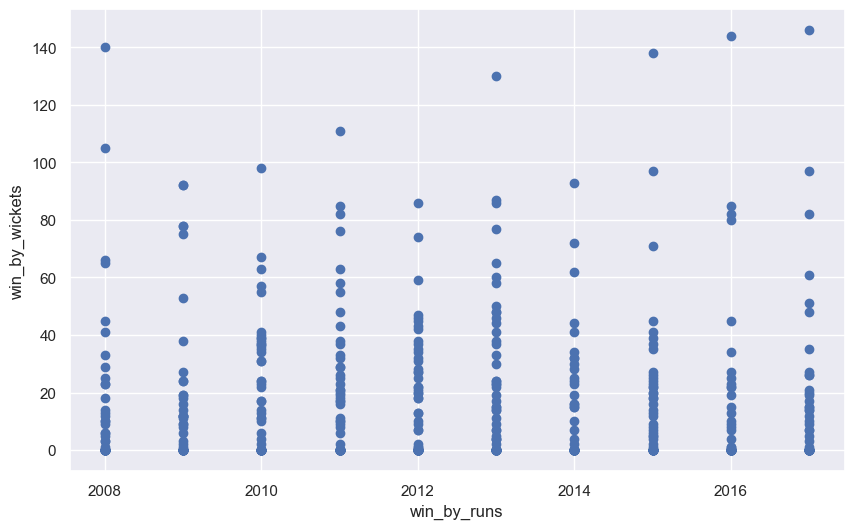

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
# ax.scatter(df['win_by_runs'], df['win_by_wickets'])
ax.scatter(df['season'], df['win_by_runs'])
ax.set_xlabel('win_by_runs')
ax.set_ylabel('win_by_wickets')
plt.show()

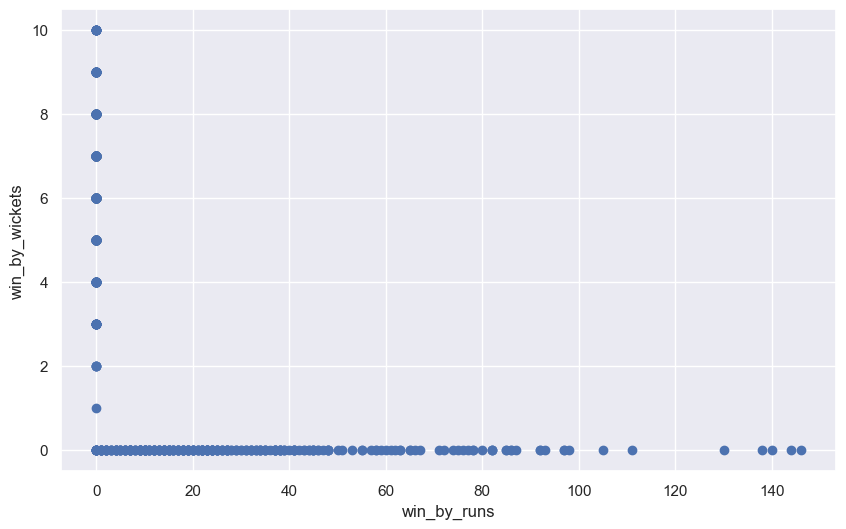

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['win_by_runs'], df['win_by_wickets'])
ax.set_xlabel('win_by_runs')
ax.set_ylabel('win_by_wickets')
plt.show()